In [1]:
import numpy as np

In [2]:
class Normalization:
    def __init__(self,):
        self.mean = np.zeros([1,64]) # means of training features
        self.std = np.zeros([1,64]) # standard deviation of training features

    def fit(self,x):
        self.mean=np.mean(x,axis=0)
        self.std=np.std(x,axis=0)

        return self.mean, self.std

    def normalize(self,x):
        # normalize the given samples to have zero mean and unit variance (add 1e-15 to std to avoid numeric issue)
        data = (x - self.mean) / (self.std + 1e-15)
        return data

def process_label(label):
    # convert the labels into one-hot vector for training
    one_hot = np.zeros([len(label), 10])
    for i, j in enumerate(label):
        one_hot[i][j] = 1
    return one_hot


def tanh(x):
    # implement the hyperbolic tangent activation function for hidden layer
    # You may receive some warning messages from Numpy. No worries, they should not affect your final results
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


def softmax(x):
    # implement the softmax activation function for output layer
    max = np.max(
        x, axis=1, keepdims=True
    )  # returns max of each row and keeps same dims
    e_x = np.exp(x - max)  # subtracts each row with its max value
    sum = np.sum(
        e_x, axis=1, keepdims=True
    )  # returns sum of each row and keeps same dims
    f_x = e_x / sum
    return np.array(f_x)


class MLP:
    def __init__(self, num_hid):
        # initialize the weights
        self.weight_1 = np.random.random([64, num_hid])
        self.bias_1 = np.random.random([1, num_hid])
        self.weight_2 = np.random.random([num_hid, 10])
        self.bias_2 = np.random.random([1, 10])

    def fit(self, train_x, train_y, valid_x, valid_y):
        # learning rate
        lr = 5e-3
        # counter for recording the number of epochs without improvement
        count = 0
        best_valid_acc = 0

        """
        Stop the training if there is no improvment over the best validation accuracy for more than 50 iterations
        """
        while count <= 50:
            # training with all samples (full-batch gradient descents)
            # implement the forward pass (from inputs to predictions)

            f = train_x @ self.weight_1 + self.bias_1
            z = tanh(f)
            g = z @ self.weight_2 + self.bias_2
            pred_y = softmax(g)

            # implement the backward pass (backpropagation)
            # compute the gradients w.r.t. different parameters

            # For weight_2 and bias_2
            # dE/dv_j_k = -\Sigma_j_C dE/dy_k dy_k/dg_k dg_k/dv_j_k
            #           = (r - y) z
            error = train_y - pred_y
            dE_dvh = -(error.T @ z).T

            # dE/dv0 = dE/dy dy/dg dg/dvh
            dE_dv0 = -np.sum(error, axis=0)

            # For weight_1 and bias_1
            # dE/dwh = dE/dy dy/dg dg/dz dz/df df/dwh
            #        = (r - y) Vh 1-z^2 Xh
            dE_dwh = -(((error @ self.weight_2.T) * (1 - (z * z))).T @ train_x).T

            # dE/dwh = dE/dy dy/dg dg/dz dz/df df/dw0
            dE_dw0 = -np.sum(((error @ self.weight_2.T) * (1 - (z * z))), axis=0)

            # update the parameters based on sum of gradients for all training samples
            self.weight_1 -= lr * dE_dwh
            self.bias_1 -= lr * dE_dw0

            self.weight_2 -= lr * dE_dvh
            self.bias_2 -= lr * dE_dv0

            # evaluate on validation data
            predictions = self.predict(valid_x)
            valid_acc = np.count_nonzero(
                predictions.reshape(-1) == valid_y.reshape(-1)
            ) / len(valid_x)

            # compare the current validation accuracy with the best one
            if valid_acc > best_valid_acc:
                best_valid_acc = valid_acc
                count = 0
            else:
                count += 1

        return best_valid_acc

    def predict(self, x):
        # generate the predicted probability of different classes
        # Fully connected
        f = x @ self.weight_1 + self.bias_1
        # actvation by tanh
        z = tanh(f)
        # Fully connected
        g = z @ self.weight_2 + self.bias_2
        # actvation by softmax
        pred_y = softmax(g)

        # convert class probability to predicted labels
        y = np.array([np.argmax(i) for i in pred_y])
        return y

    def get_hidden(self, x):
        # extract the intermediate features computed at the hidden layers (after applying activation function)
        z = tanh(x @ self.weight_1 + self.bias_1)
        return z

    def params(self):
        return self.weight_1, self.bias_1, self.weight_2, self.bias_2

In [3]:
from matplotlib import pyplot as plt

In [4]:
# recommended color for different digits
color_mapping = {0:'red',1:'green',2:'blue',3:'yellow',4:'magenta',5:'orangered',
                6:'cyan',7:'purple',8:'gold',9:'pink'}

def plot2d(data,label,split='train'):
    # 2d scatter plot of the hidden features
    fig = plt.figure()
    plt.scatter(data[:,0],data[:,1],c=[color_mapping[cur] for cur in label])
    fig.savefig('hidden_2d_'+split+'.png')
    plt.show()

def plot3d(data,label,split='train'):
    # 3d scatter plot of the hidden features
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0],data[:,1],data[:,2],c=[color_mapping[cur] for cur in label])
    fig.savefig('hidden_3d_'+split+'.png')
    plt.show()


Validation accuracy for 4 hidden units is 0.855
Validation accuracy for 16 hidden units is 0.922
Validation accuracy for 20 hidden units is 0.927
Validation accuracy for 24 hidden units is 0.916
Validation accuracy for 32 hidden units is 0.920
Validation accuracy for 48 hidden units is 0.920


C:\Users\micke\Desktop\MyMLP.py:30: RuntimeWarning: overflow encountered in exp
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
C:\Users\micke\Desktop\MyMLP.py:30: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


Test accuracy with 20 hidden units is 0.921


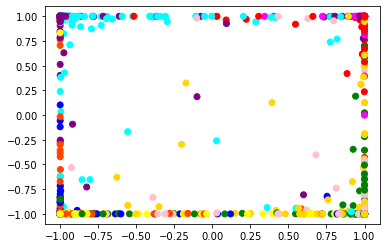

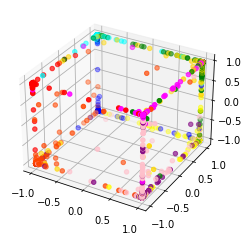

In [5]:
#import libraries
import numpy as np
from MyMLP import MLP, Normalization, process_label
from visualization import plot2d, plot3d

# read in data.
# training data
train_data = np.genfromtxt("optdigits_train.txt",delimiter=",")
train_x = train_data[:,:-1]
train_y = train_data[:,-1].astype('int')

# validation data
valid_data = np.genfromtxt("optdigits_valid.txt",delimiter=",")
valid_x = valid_data[:,:-1]
valid_y = valid_data[:,-1].astype('int')

# test data
test_data = np.genfromtxt("optdigits_test.txt",delimiter=",")
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype('int')

# normalize the data
normalizer = Normalization()
normalizer.fit(train_x)
train_x = normalizer.normalize(train_x)
valid_x = normalizer.normalize(valid_x)
test_x = normalizer.normalize(test_x)

# process training labels into one-hot vectors
train_y = process_label(train_y)

############### Problem a ###################
# experiment with different numbers of hidden units
candidate_num_hid = [4,16,20,24,32,48]
valid_accuracy = []
for i, num_hid in enumerate(candidate_num_hid):
    # initialize the model
    clf = MLP(num_hid=num_hid)
    # update the model based on training data, and record the best validation accuracy
    cur_valid_accuracy = clf.fit(train_x,train_y,valid_x,valid_y)
    valid_accuracy.append(cur_valid_accuracy)
    print('Validation accuracy for %d hidden units is %.3f' %(candidate_num_hid[i],cur_valid_accuracy))

# select the best number of hidden unit and use it to train the model
best_num_hid = candidate_num_hid[np.argmax(valid_accuracy)]
clf = MLP(num_hid=best_num_hid)
_ = clf.fit(train_x,train_y,valid_x,valid_y)

# evaluate on test data
predictions = clf.predict(test_x)
accuracy = np.count_nonzero(predictions.reshape(-1)==test_y.reshape(-1))/len(test_x)

print('Test accuracy with %d hidden units is %.3f' %(best_num_hid,accuracy))


############### Problem b ###################
# visualization for 2 hidden units
clf = MLP(num_hid=2)
_ = clf.fit(train_x,train_y,valid_x,valid_y)
# validation set visualization
hid_features = clf.get_hidden(valid_x)
plot2d(hid_features,valid_y,'valid')


# visualization for 3 hidden units
clf = MLP(num_hid=3)
_ = clf.fit(train_x,train_y,valid_x,valid_y)
# validation set visualization
hid_features = clf.get_hidden(valid_x)
plot3d(hid_features,valid_y,'valid')
